# MODBUS GETTING STARTED

# 1. Connect Robot

### 1.1 Define parameters and establish connection
Before establish the connection, please make sure your robot has remote and modbus enabled. Also make sure your robot is running in Auto Mode. 
https://pymodbus.readthedocs.io/en/latest/source/library/pymodbus.client.html?highlight=ModbusTcpClient#pymodbus.client.sync.ModbusTcpClient

In [1]:
from pymodbus.client.sync import ModbusTcpClient

# Define device/robot parameters
SERVER_IP = '192.168.132.173' # TMrobot
SERVER_PORT = 502
DEVICE_ID = 1

# Establish TCP connection
print('Trying to establish connection.....')
client = ModbusTcpClient(host=SERVER_IP, port=SERVER_PORT)

if client.connect():
    print("Connection to Robot %s:%d established succesfully" % (SERVER_IP, SERVER_PORT))
else:
    print("[Error] Fail to connect to modbus slave %s:%d." % (SERVER_IP, SERVER_PORT))
    exit()

Trying to establish connection.....
Connection to Robot 192.168.132.173:502 established succesfully


# 2. GET INFO (Read Data)

## 2.1 Robot Joint Speed Data

<IPython.core.display.Javascript object>


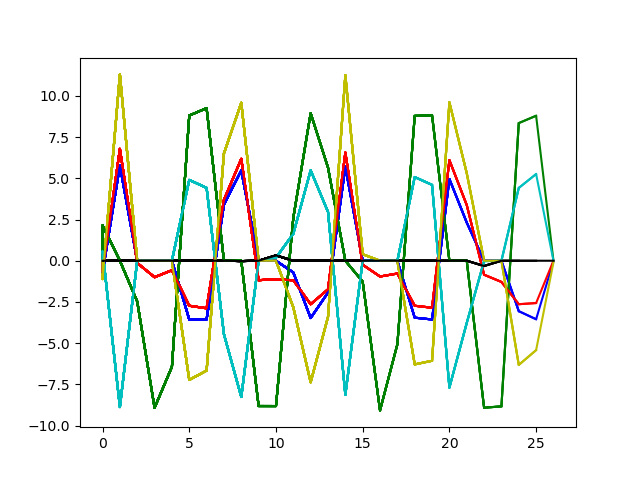

KeyboardInterrupt: 

In [2]:
%matplotlib notebook
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from pymodbus.payload import BinaryPayloadDecoder
from pymodbus.constants import Endian

# create speed variables
list_spd1, list_spd2, list_spd3, list_spd4, list_spd5, list_spd6 = [0,0],[0,0],[0,0],[0,0],[0,0],[0,0]
list_i = [0, 0]
list_time = [time.time()]
i = 0

# Define plot settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()


while True:
    # Read torque values
    modbus_spdJ1 = client.read_input_registers(address=7913, count=2)
    modbus_spdJ1 = BinaryPayloadDecoder.fromRegisters(modbus_spdJ1.registers, 
                                                      Endian.Big, wordorder=Endian.Big).decode_32bit_float()
    list_spd1.append(modbus_spdJ1)
    
    modbus_spdJ2 = client.read_input_registers(address=7915, count=2)
    modbus_spdJ2 = BinaryPayloadDecoder.fromRegisters(modbus_spdJ2.registers, 
                                                      Endian.Big, wordorder=Endian.Big).decode_32bit_float()
    list_spd2.append(modbus_spdJ2)
    
    modbus_spdJ3 = client.read_input_registers(address=7917, count=2)
    modbus_spdJ3 = BinaryPayloadDecoder.fromRegisters(modbus_spdJ3.registers, 
                                                      Endian.Big, wordorder=Endian.Big).decode_32bit_float()
    list_spd3.append(modbus_spdJ3)

    modbus_spdJ4 = client.read_input_registers(address=7919, count=2)
    modbus_spdJ4 = BinaryPayloadDecoder.fromRegisters(modbus_spdJ4.registers, 
                                                      Endian.Big, wordorder=Endian.Big).decode_32bit_float()
    list_spd4.append(modbus_spdJ4)
    
    modbus_spdJ5 = client.read_input_registers(address=7921, count=2)
    modbus_spdJ5 = BinaryPayloadDecoder.fromRegisters(modbus_spdJ5.registers, 
                                                      Endian.Big, wordorder=Endian.Big).decode_32bit_float()
    list_spd5.append(modbus_spdJ5)
    
    modbus_spdJ6 = client.read_input_registers(address=7923, count=2)
    modbus_spdJ6 = BinaryPayloadDecoder.fromRegisters(modbus_spdJ6.registers, 
                                                      Endian.Big, wordorder=Endian.Big).decode_32bit_float()
    list_spd6.append(modbus_spdJ6)
    
    
    # update time and iterator counter
    t = time.time()
    list_time.append(t)
    list_i.append(i)
    i += 1
    
    # plot the results
    ax.plot(list_i[:-2], list_spd1[:-2], 'b')
    ax.plot(list_i[:-2], list_spd2[:-2], 'g')
    ax.plot(list_i[:-2], list_spd3[:-2], 'r')
    ax.plot(list_i[:-2], list_spd4[:-2], 'c')
    ax.plot(list_i[:-2], list_spd5[:-2], 'y')
    ax.plot(list_i[:-2], list_spd6[:-2], 'k')
    fig.canvas.draw()
    
    # control data collection interval
    time.sleep(1) 
    